# Linear Regression

* Linear regression is a linear model.
* A model that assumes a linear relationship between the input variable (x) and the single output variable (y).
* (y) can be calculated from a linear combination of the input variable (x).
* When there is a single input variable (x), the method is referred to as **simple linear regression**.
* When there are multiple input variable, its often refers to as **multiple linear regression**.
* Input (x) and output (y) are numeric.

In Math, the linear regression line has an equation of the form:

```
y = xw + b
```

where,

* x is the explanatory variable
* y is the dependent variable
* w is the slope of the line
* b is the intercept (the value of y when x = 0)

In [43]:
# Import the relevant libraries
import numpy as np
import matplotlib.pyplot as plt # Optional, not required for model algorithm

# Import TensorFlow
import tensorflow as tf

## Generate random input data to train on

1. Draw samples from a [uniform distribution](http://mathworld.wolfram.com/UniformDistribution.html) using [Numpy's Random Uniform method](https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.uniform.html).

2. In uniform distribution, `size = number of observations (n) * number of variables (k)`

```
input = n * k = 1000 * 1 [here k=1, as we are consider only 1 input (x)]
```

We have create a input data like `1000 * 1` matrix, which means `1` variables problem with `1000` observations.

In [44]:
observations = 1000

"""
1. Here, we are creating 2 input variables (x) and (z) problem with 1000 observations.
"""
x = np.random.uniform(low=-10, high=10, size=(observations, 1))
z = np.random.uniform(low=-10, high=10, size=(observations, 1))

* In our example we have 2 input variables and 1000 observations, thus we need `1000 * 2` matrix.
* We will combine samples (x) and (z) into `1` martix, by using `column_stack` function which takes a sequence of 1D-array and stacks them into a single 2D-array, which results into a matrix of `1000 * 2`.

Notes:

* Dimension are important in linear algebram as we can only multiple matrix that are compatible.
* We want to make sure we can multiple (x) times (w), since our linear model relies on that.
* We have created an input data `1000 * 2`, means `2` variables problems with `1000` observations.

In [45]:
inputs = np.column_stack((x, z))

# Lets know the shape of the input to verify the results
print(inputs.shape)

(1000, 2)


## Create the targets we will aim at

In supervized learning, below are the elements of the model:

1. Inputs
2. Weights
3. Biases
4. Outputs
5. Targets

**Notes**

* 2 major parameters are `inputs` and `targets`.
* We also need to generate targets.
* Weights, Biases and Outputs varies based on the algorithms.

Consider a targets = `f(x, z) = 2*x - 3*z + 5 + noise`. (*Completely arbitrarily chosen, We can try different functions as well.*)

Conceptually, the algorithm must learn this is the function and the Weights are `2` and `-3`
and the Bias is `5`.

We are introducing noice will make data bit random. Real data always contents noise.

In [46]:
noise = np.random.uniform(low=-1, high=1, size=(observations, 1))

targets = 2*x - 3*z + 5 + noise
# targets = 13*x - 7*z - 12 + noise # Try diff formula values

# Lets verify the shape of target after the x and z are applied
print(targets.shape)

(1000, 1)


## Save n-dim array

Save n-dimensional arrays in `.npz` format using a certain keyword (label) for each array.

In [47]:
np.savez("TF_intro", inputs=inputs, targets=targets)

## Load the data

Load the data using `.npz` file.

In [48]:
training_data = np.load("TF_intro.npz")

In [49]:
input_size = 2 # As we have 2 input variables, (x) and (z)
output_size = 1 # As we have only 1 output (y)

## In TF, actually, we must build the model

In TF,

* `Sequential()` function specifies the model will laid down the stacks layers.
* `Dense()` function perform the dot products of inputs and weights and then add bias.
* `compile(optimizer, loss)` configures the model for training.

1. L2-norm loss = Least sum of squares (least sum of squared error)
2. Scaling by observations = average (mean)

**Verbose parameters**

|Verbose|Purpse|
|:---|:---|
|0|`silent` or no output about the training is displayed.|
|1|shows `progress-bar`| 
|2|shows `one line per epoch`|

**Notes:**

* TF2 is based on Keras.
* `Output = np.dot(inputs, weights) + bias`.
* `sgd` stands for Stochastic Gradient Descent.
* Iteration over the full dataset is called `Epoch`.

**References**

* [Batch vs Stochastic Gradient Descent](https://towardsdatascience.com/difference-between-batch-gradient-descent-and-stochastic-gradient-descent-1187f1291aa1)
* [TensorFlow docs for optimizer SDG](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD)
* [TensorFlow docs for L2-norm loss with scaling by observation](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError)

In [50]:
# Use the defaults TF settings for weights, biases and learning-rate
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])
model.compile(optimizer="sgd", loss="mean_squared_error")


"""
Customize and add our own weights, biase and learning-rate
"""
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(
#         output_size,
#         kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1) # weights
#         kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1) # biases
#     )
# ])
# custom_optimizer = tf.keras.optimizer.SDG(learing_rate=0.02)
# model.compile(optimizer=custom_optimizer, loss="mean_squared_error")

model.fit(training_data["inputs"], training_data["targets"], epochs=100, verbose=1)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 197us/sample - loss: 39.9763
Epoch 2/100
1000/1000 [==============================] - 0s 26us/sample - loss: 4.2850
Epoch 3/100
1000/1000 [==============================] - 0s 26us/sample - loss: 1.3959
Epoch 4/100
1000/1000 [==============================] - 0s 26us/sample - loss: 0.6289
Epoch 5/100
1000/1000 [==============================] - 0s 28us/sample - loss: 0.4120
Epoch 6/100
1000/1000 [==============================] - 0s 28us/sample - loss: 0.3489
Epoch 7/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.3385
Epoch 8/100
1000/1000 [==============================] - 0s 28us/sample - loss: 0.3297
Epoch 9/100
1000/1000 [==============================] - 0s 31us/sample - loss: 0.3285
Epoch 10/100
1000/1000 [==============================] - 0s 27us/sample - loss: 0.3296
Epoch 11/100
1000/1000 [==============================] - 0s 26us/sample - loss: 0.3230
Epoch 12/100
1000

Epoch 94/100
1000/1000 [==============================] - 0s 27us/sample - loss: 0.3297
Epoch 95/100
1000/1000 [==============================] - 0s 26us/sample - loss: 0.3326
Epoch 96/100
1000/1000 [==============================] - 0s 26us/sample - loss: 0.3301
Epoch 97/100
1000/1000 [==============================] - 0s 26us/sample - loss: 0.3361
Epoch 98/100
1000/1000 [==============================] - 0s 26us/sample - loss: 0.3352
Epoch 99/100
1000/1000 [==============================] - 0s 26us/sample - loss: 0.3296
Epoch 100/100
1000/1000 [==============================] - 0s 26us/sample - loss: 0.3291


## Extract the weights and biases

In [51]:
model.layers[0].get_weights()

[array([[ 2.0076172],
        [-3.002027 ]], dtype=float32), array([5.002446], dtype=float32)]

In [52]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0076172],
       [-3.002027 ]], dtype=float32)

In [53]:
bias = model.layers[0].get_weights()[1]
bias

array([5.002446], dtype=float32)

## Extract the outputs (make predictions)

Calculate the outputs for given inputs

In [54]:
outputs = model.predict_on_batch(training_data["inputs"])
outputs

<tf.Tensor: id=27742, shape=(1000, 1), dtype=float32, numpy=
array([[-2.57887383e+01],
       [ 3.35014267e+01],
       [ 2.84449806e+01],
       [ 9.41055107e+00],
       [-1.45121660e+01],
       [ 1.67493057e+00],
       [ 7.47112560e+00],
       [ 2.10863686e+01],
       [ 1.54884338e+00],
       [-2.39943771e+01],
       [ 4.72579479e+00],
       [ 6.40928078e+00],
       [ 1.68443794e+01],
       [ 9.96205807e+00],
       [-9.86360073e+00],
       [ 1.59855747e+00],
       [ 1.78235130e+01],
       [-1.44390860e+01],
       [-6.39323902e+00],
       [-1.82614861e+01],
       [-1.35692186e+01],
       [-2.74249840e+01],
       [-7.13711262e+00],
       [-1.62103176e+00],
       [-1.26096048e+01],
       [-2.73493843e+01],
       [ 3.46968803e+01],
       [ 5.01227379e-01],
       [-8.59822750e+00],
       [-2.83745575e+01],
       [ 7.85291243e+00],
       [ 1.36943798e+01],
       [ 6.25712204e+00],
       [ 9.31005573e+00],
       [ 4.39557571e+01],
       [ 3.25570564e+01],
   

Above values are used to compared to the targets to evaluate the loss function. These are the outputs based on the trained model.

## Lets compare outputs and targets manually

See the outputs and targets are very close to each other.

In [55]:
targets = training_data["targets"]
targets

array([[-2.66732071e+01],
       [ 3.41077445e+01],
       [ 2.92773175e+01],
       [ 9.23605976e+00],
       [-1.41334015e+01],
       [ 1.88141103e+00],
       [ 7.09891746e+00],
       [ 2.08882820e+01],
       [ 1.88681966e+00],
       [-2.33720980e+01],
       [ 5.15270546e+00],
       [ 7.27853968e+00],
       [ 1.67090567e+01],
       [ 8.96325859e+00],
       [-1.05034140e+01],
       [ 7.09574860e-01],
       [ 1.86641467e+01],
       [-1.48341704e+01],
       [-6.26673691e+00],
       [-1.75197099e+01],
       [-1.30347258e+01],
       [-2.77038381e+01],
       [-7.86835708e+00],
       [-1.98213683e+00],
       [-1.31360193e+01],
       [-2.78346051e+01],
       [ 3.37494927e+01],
       [ 1.23038131e+00],
       [-9.32735956e+00],
       [-2.85832889e+01],
       [ 7.30912424e+00],
       [ 1.41075558e+01],
       [ 5.45000406e+00],
       [ 9.51040749e+00],
       [ 4.29580269e+01],
       [ 3.24912072e+01],
       [ 3.46132812e+01],
       [ 2.01601795e+00],
       [-1.4

## Plot last outputs vs targets

Since they are the last ones at the end of the training, they represent the final model accuracy.
The closed this plot is to a 45 degree line, the closer target and output values are.

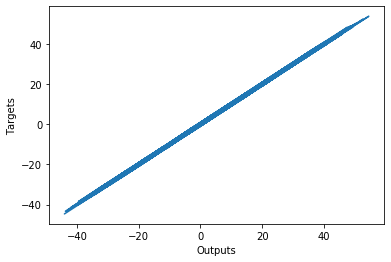

In [56]:
plt.plot(outputs, targets)
plt.xlabel("Outputs")
plt.ylabel("Targets")
plt.show()